Nama :
Nadia Amalia Maslahah

Bacth 4 **PYTHON DATA SCIENCE**

## Import Libraries

Melakukan import libraries yang digunakan dalam project.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy import stats
import pickle

print('Libraries sudah siap')

Libraries sudah siap


## Data Loading

**Melakukan proses data loading menggunakan library Pandas**

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dataset memiliki tipe data yang bervariasi yakni float, integer (numerik) dan object (ID). Selain itu juga terdapat missing value pada dataset karena banyaknya nilai non-null pada beberapa atribut tidak sesuai dengan banyaknya data entri.

In [6]:
df.shape

(8950, 18)

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Melihat unique values pada setiap atribut

In [9]:
for col in df.columns:
    print(col,': ', df[col].nunique())

CUST_ID :  8950
BALANCE :  8871
BALANCE_FREQUENCY :  43
PURCHASES :  6203
ONEOFF_PURCHASES :  4014
INSTALLMENTS_PURCHASES :  4452
CASH_ADVANCE :  4323
PURCHASES_FREQUENCY :  47
ONEOFF_PURCHASES_FREQUENCY :  47
PURCHASES_INSTALLMENTS_FREQUENCY :  47
CASH_ADVANCE_FREQUENCY :  54
CASH_ADVANCE_TRX :  65
PURCHASES_TRX :  173
CREDIT_LIMIT :  205
PAYMENTS :  8711
MINIMUM_PAYMENTS :  8636
PRC_FULL_PAYMENT :  47
TENURE :  7


**Mengecek missing value dan jumlahnya**

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Diperoleh bahwa terdapat missing value pada atribut credit limit dan minimum payments. Untuk itu perlu adanya penanganan terhadap missing value tersebut.

In [11]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

CUST_ID                              0.0 %
PAYMENTS                             0.0 %
PURCHASES_TRX                        0.0 %
CASH_ADVANCE_TRX                     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
PRC_FULL_PAYMENT                     0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
CASH_ADVANCE                         0.0 %
INSTALLMENTS_PURCHASES               0.0 %
ONEOFF_PURCHASES                     0.0 %
PURCHASES                            0.0 %
BALANCE_FREQUENCY                    0.0 %
BALANCE                              0.0 %
PURCHASES_FREQUENCY                  0.0 %
TENURE                               0.0 %
CREDIT_LIMIT                        0.01 %
MINIMUM_PAYMENTS                     3.5 %
dtype: object

Terlihat bahwa terdapat 2 atribut yang mempunyai missing value. Untuk itu perlu dilakukan penanganan pada tahap selanjutnya.

Melihat distribusi pada semua atribut

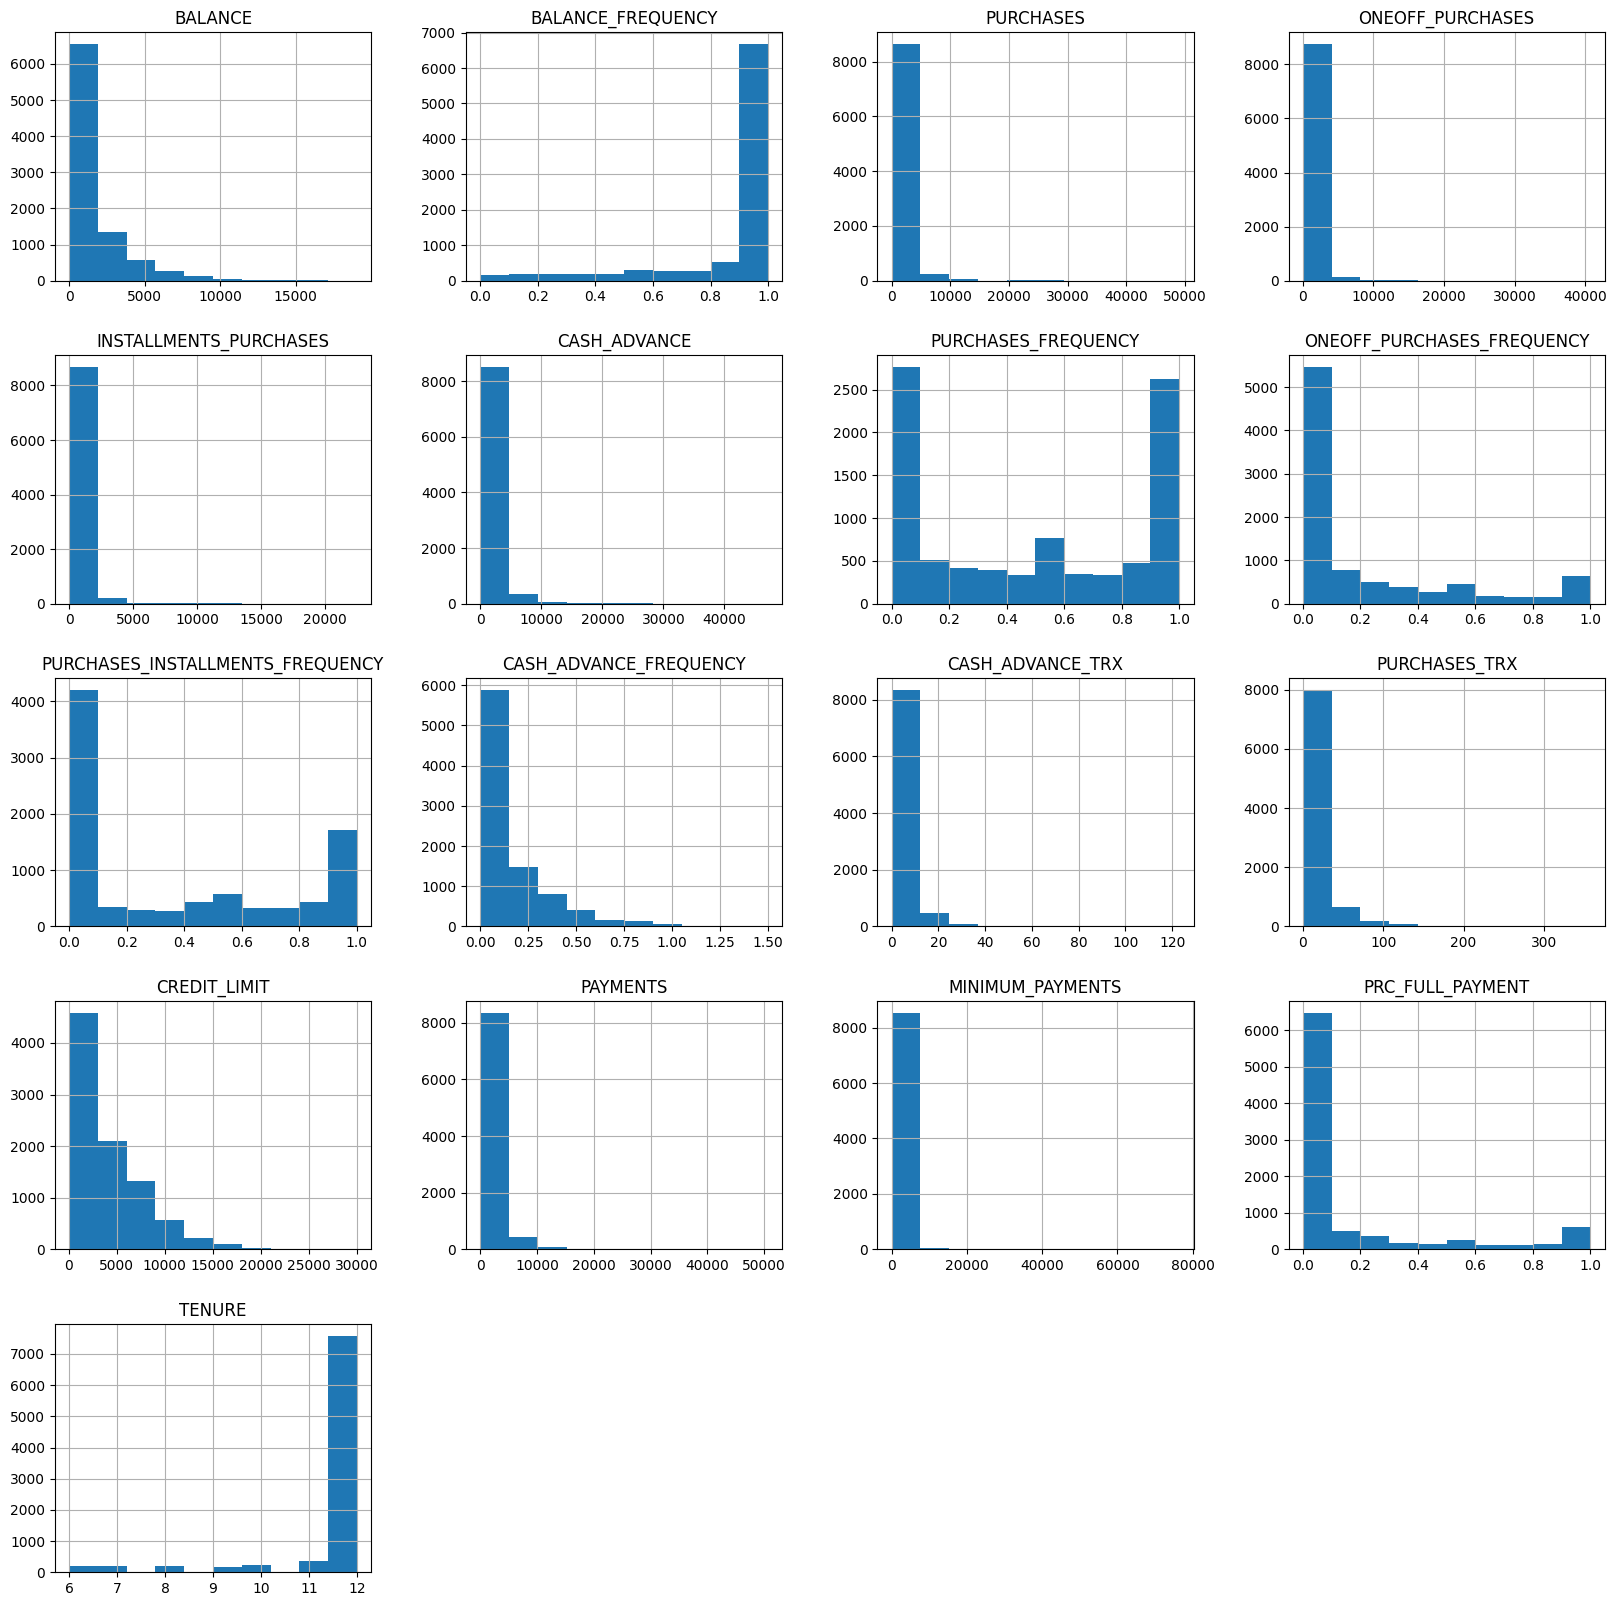

In [12]:
df.hist(bins=10, figsize = (20,20))
plt.show()

Berdasarkan histogram terlihat bahwa semua atribut memiliki distribusi data skew

Menggunakan [.describe()]() untuk mengecek statistik deskriptif dari masing-masing atribut yang bertipe numeric.

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut.

#### Mengecek duplikasi data

In [14]:
df.duplicated().sum()

0

Terlihat bahwa tidak terdapat duplikasi data.

#### Melakukan penanganan terhadap missing value

Melakukan penanganan terhadap missing value yang telah diketahui sebelumnya menggunakan imputasi median

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X)

df['MINIMUM_PAYMENTS_NEW'] = X

X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2)

df['CREDIT_LIMIT_NEW'] = X2

df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)

In [16]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
MINIMUM_PAYMENTS_NEW                0
CREDIT_LIMIT_NEW                    0
dtype: int64

#### Mengganti nama atribut

In [17]:
df2 = df.rename(columns={
    'CUST_ID':'ID'
})

In [18]:
df2.head()

,ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,312.343947,7500.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0


## Exploratory Data Analysis

### Descriptive Statistics

Melihat statistik deskriptif pada data numerik

In [19]:
df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,1733.143852,0.153715,11.517318,844.906767,4494.282473
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,2895.063757,0.292499,1.338331,2332.792322,3638.646702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.019163,50.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,383.276166,0.000000,12.000000,170.857654,1600.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,856.901546,0.000000,12.000000,312.343947,3000.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,1901.134317,0.142857,12.000000,788.713501,6500.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,50721.483360,1.000000,12.000000,76406.207520,30000.000000


Diperoleh informasi bahwa:
- rata-rata saldo/Balance dari semua nasabah yaitu 1564 dollar
- rata-rata saldo terupdate dari semua nasabah yakni 0,877 yang artinya mayoritas nasabah aktif mengupdate saldonya.
- Purchases paling banyak yakni 49039.57 purchases
- Credit limit minimal yaitu 50 dollar dan maksimal yaitu 30000 dollar.

### Correlation Matrix

In [20]:
df2.corr()

<ipython-input-20-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.322802,-0.318959,0.072692,0.397920,0.531296
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.065008,-0.095082,0.119776,0.131181,0.095931
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.603264,0.180379,0.086288,0.095789,0.356977
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.567292,0.132763,0.064150,0.050256,0.319735
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.384084,0.182569,0.086143,0.134019,0.256515
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.453238,-0.152935,-0.068312,0.140747,0.303997
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.103464,0.305802,0.061506,0.006154,0.119833
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.243537,0.157531,0.082466,-0.027311,0.295059
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.085551,0.250087,0.073275,0.032055,0.060794
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.183192,-0.249773,-0.133372,0.100616,0.132608


Melakukan visualisasi korelasi antar variabel untuk melihat hubungan

<ipython-input-21-0b23c3f5422b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(df2.corr(), linewidths = .5, annot=True, fmt='.2f')


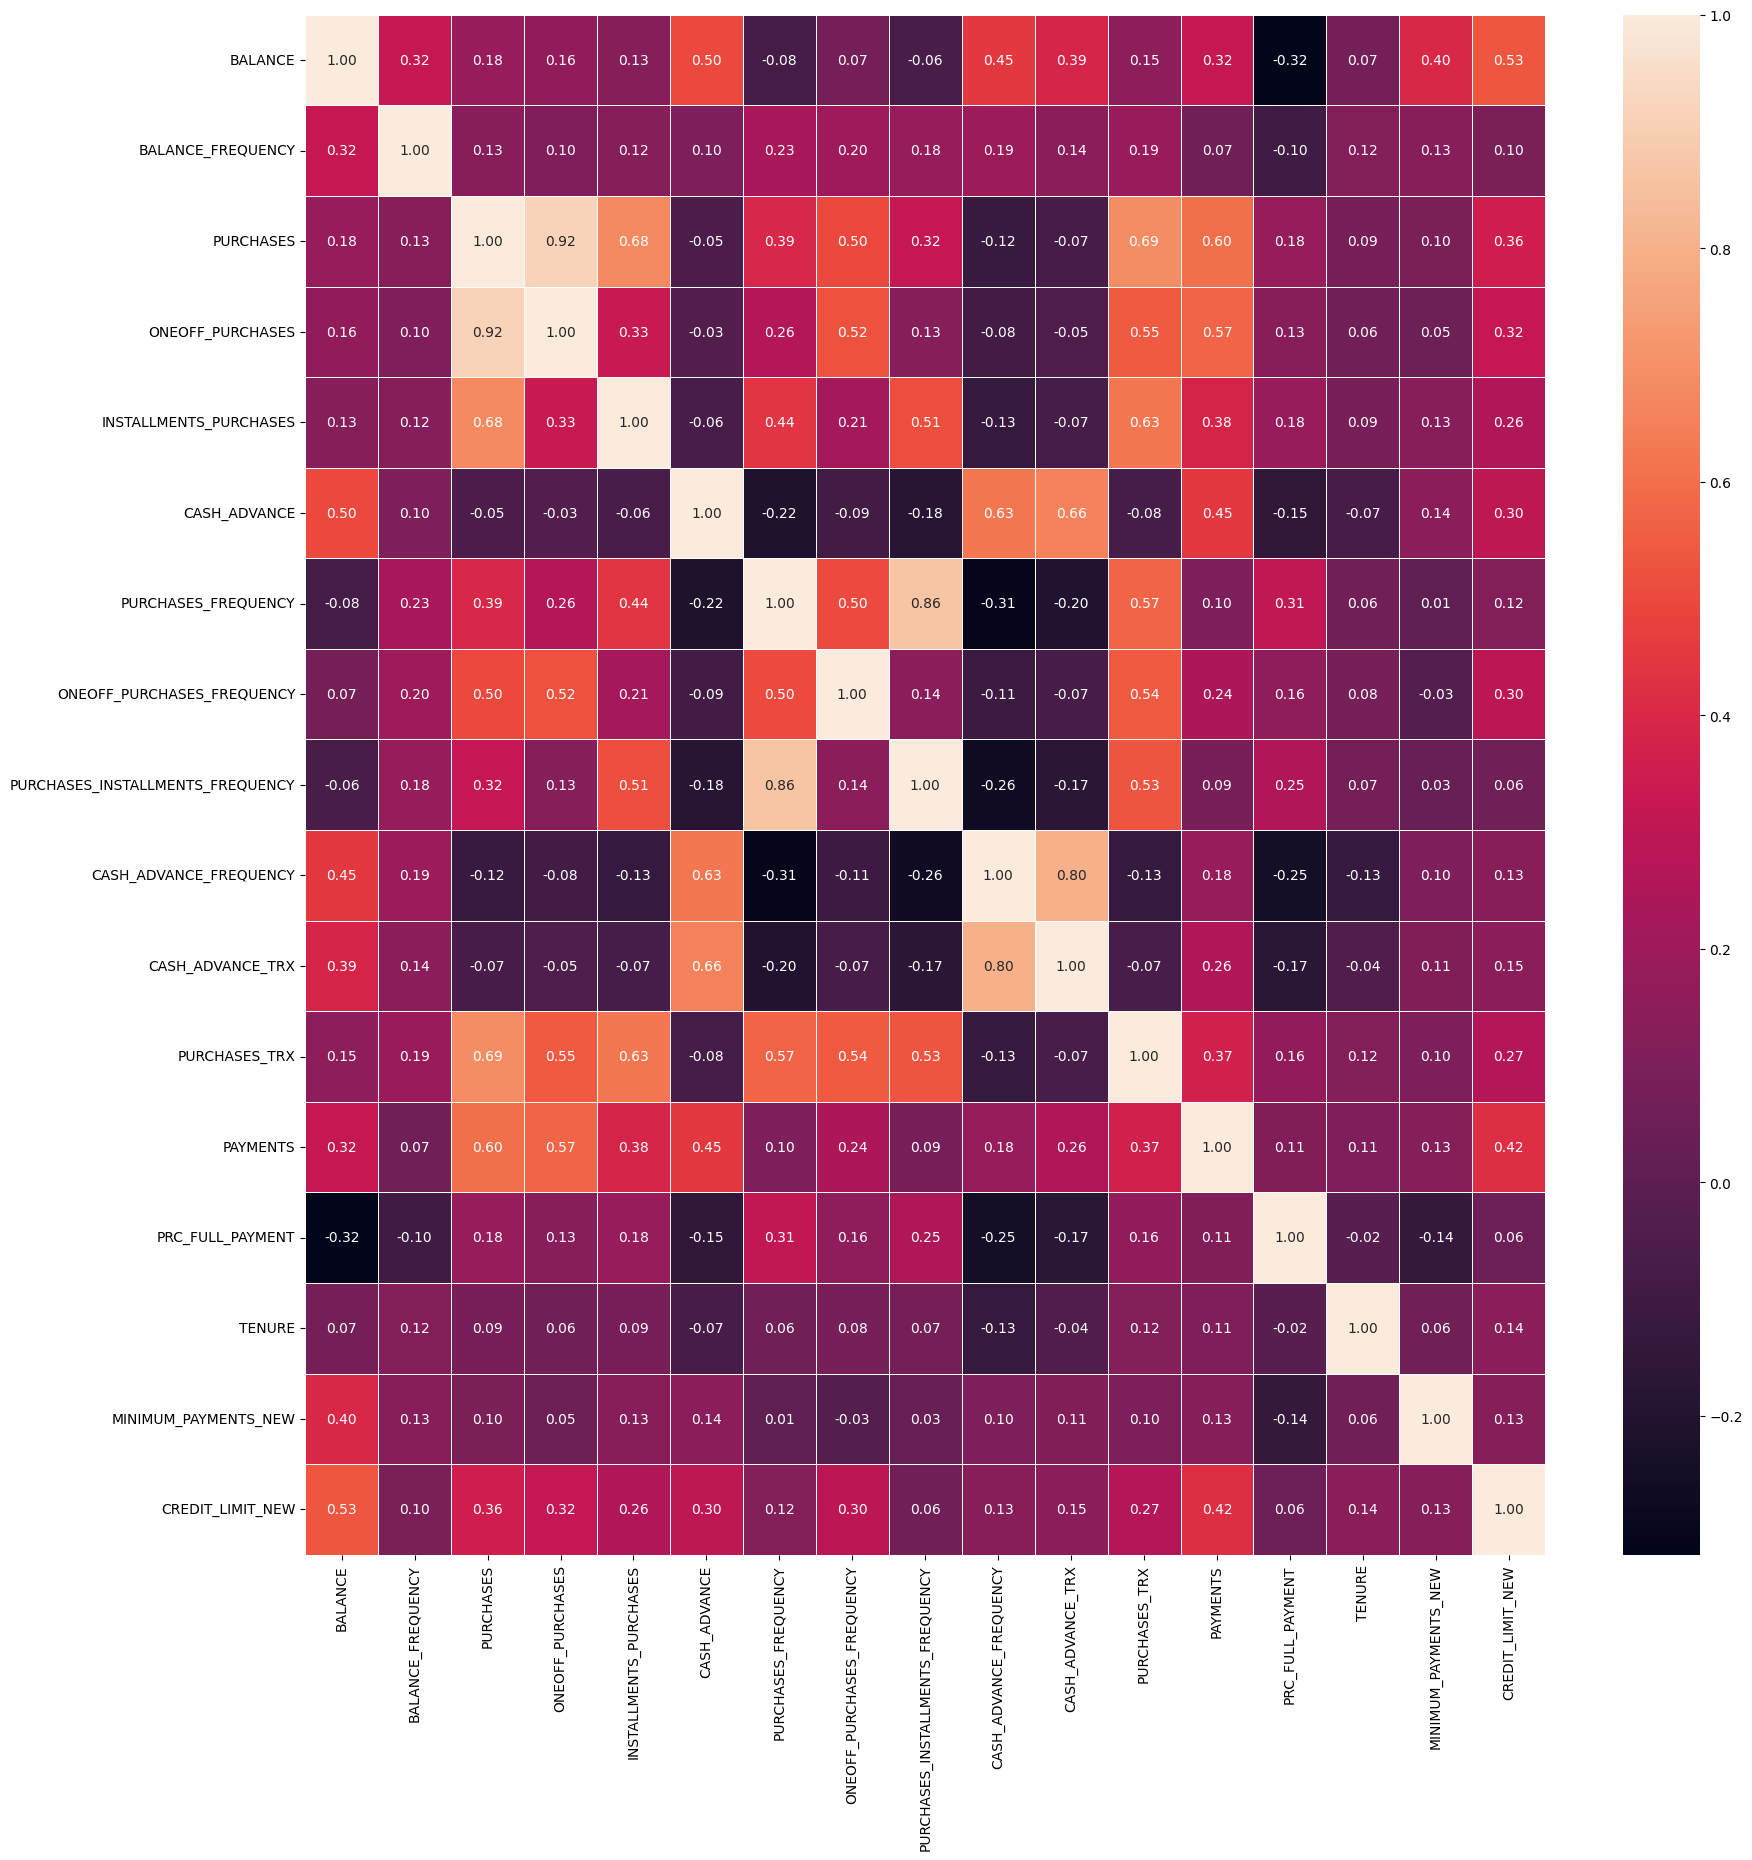

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df2.corr(), linewidths = .5, annot=True, fmt='.2f')

Terlihat bahwa terdapat korelasi yang tinggi (>0,8) diantara atribut PURCHASES_INSTALLMENTS_FREQUENCY dan PURCHASES_FREQUENCY ; CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX ; ONEOFF_PURCHASES dan PURCHASES

## Data Preprocessing

Selanjutnya melakukan pre-processing sebelum melakukan training model.

### Drop ID

In [23]:
df2.drop(['ID','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','ONEOFF_PURCHASES'], axis=1, inplace=True)

In [24]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,201.802084,0.000000,12,139.509787,1000.0
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,4103.032597,0.222222,12,1072.340217,7000.0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,622.066742,0.000000,12,627.284787,7500.0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,0.000000,0.000000,12,312.343947,7500.0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,678.334763,0.000000,12,244.791237,1200.0


### Standardize & Normalize Data

Diketahui sebelumnya bahwa data memiliki range yang berbeda dan satuan yang berbeda, untuk itu perlu dilakukan standard scaler agar diperoleh kesamaan dlm satuan.

In [25]:
sc = StandardScaler()
df2=sc.fit_transform(df2)

In [26]:
normalized_df = normalize(df2)

In [27]:
normalized_df.shape

(8950, 14)

In [28]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
normalised = pd.DataFrame(normalized_df,columns=feat_cols)
normalised.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,-0.152274,0.106905,-0.068774,-0.027371,-0.096320,0.262029,-0.140040,-0.139356,-0.072306,-0.100329,0.244305,-0.850722,-0.070416,-0.198171
8946,-0.157167,0.109676,-0.069676,-0.026001,-0.098816,0.268819,-0.143669,-0.142968,-0.074179,-0.106566,-0.111256,-0.872768,-0.048331,-0.203307
8947,-0.160393,-0.040180,-0.087078,-0.063883,-0.101120,0.185127,-0.147018,-0.146301,-0.084624,-0.123612,0.071315,-0.893116,-0.070811,-0.208047
8948,-0.157767,-0.039269,-0.099413,-0.096242,-0.095136,-0.258668,-0.143685,0.033351,-0.125294,-0.122910,0.069698,-0.872863,-0.071625,-0.232424
8949,-0.117541,-0.182505,0.008652,-0.093318,-0.083388,0.090184,0.319440,0.203314,0.068468,-0.118423,-0.107888,-0.846343,-0.066586,-0.185867


### Cluster Defining

In [29]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(normalised)
    inertia.append(model.inertia_)

inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,Inertia
1,8734.793220
2,6950.967184
3,6009.985740
4,5238.974035
5,4648.242210
6,4229.307633
7,3892.088187
8,3666.790372
9,3467.856806


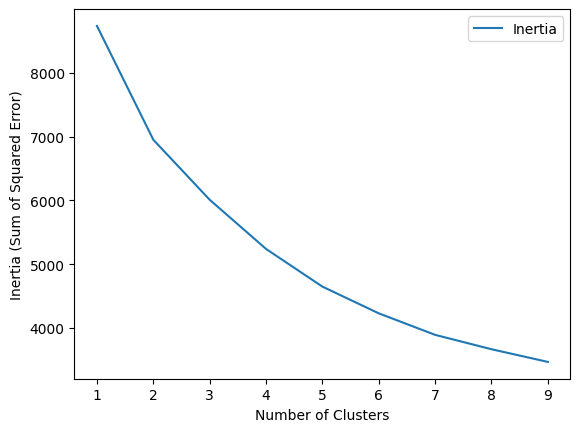

In [30]:
inertia_df.plot(kind='line')
plt.ylabel('Inertia (Sum of Squared Error)')
plt.xlabel('Number of Clusters')
plt.show()

Nilai inertia menunjukkan bahwa k kluster yang dapat dipilih yakni 4-6 kluster. Dalam memilih banyaknya kluster harus mempertimbangkan computation cost, sehingga dipilih banyaknya k kluster yakni 4 kluster.

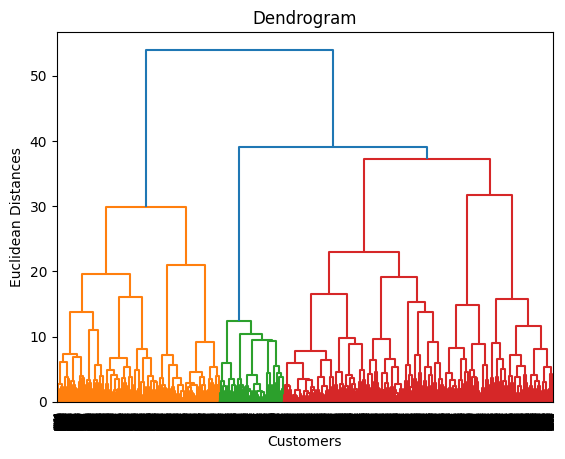

In [31]:
dendrogram = sch.dendrogram(sch.linkage(normalised, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

Penentuan banyak cluster dari dendrogram dapat dilakukan dengan mencari garis vertikal terpanjang di mana dia tidak berpotongan dengan garis horizontal manapun. Dari gambar di atas diperoleh bahwa banyak kluster yang optimal yakni 4 kluster.

## Model Defining

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

### K-Means

Metode klasterisasi pertama yang digunakan yakni K-Means.

In [32]:
km = KMeans(n_clusters=4, random_state=42)

### Agglomerative Clustering

Metode klasterisasi kedua yang digunakan yakni Hierachical Clustering. Metode ini digunakan sebagai pembanding metode sebelumnya.

In [33]:
agg = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")

## Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [34]:
norm = normalised.iloc[:,0:14]

In [35]:
model1 = km.fit(norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
model2 = agg.fit(norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Model Prediction

In [37]:
normalised['Cluster KM'] = km.fit_predict(normalised)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
normalised['Cluster AGG'] = agg.fit_predict(normalised)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [39]:
df['Cluster KM'] = km.fit_predict(normalised)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
df['Cluster AGG'] = agg.fit_predict(normalised)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih.

In [41]:
normalised.iloc[:,0:14].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.339570,-0.115713,-0.197111,-0.161938,-0.216542,-0.374131,-0.314831,-0.313295,-0.237208,-0.245394,-0.243803,0.167319,-0.140284,-0.445520
1,0.228846,0.039061,-0.136544,-0.132190,0.757703,-0.355284,-0.197353,0.166907,-0.172093,0.238059,0.068113,0.104885,0.028353,0.200266
2,0.132564,0.153598,-0.031921,-0.134770,-0.138389,0.376475,0.792607,-0.200223,-0.032322,-0.113788,-0.155812,0.106932,-0.027659,0.244917
3,0.023168,-0.479852,0.109497,-0.214493,-0.173950,-0.478518,-0.188420,-0.122169,-0.260257,-0.282493,-0.247983,0.170188,-0.107727,0.389798
4,-0.170876,0.246751,-0.220070,-0.216504,-0.222319,-0.483005,-0.190187,-0.321653,-0.262698,-0.173540,-0.250308,0.171783,-0.122530,-0.431226


In [42]:
sil_km = silhouette_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
sil_agg = silhouette_score(normalised.iloc[:,0:14], normalised['Cluster AGG'])

ch_km = calinski_harabasz_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
ch_agg = calinski_harabasz_score(normalised.iloc[:,0:14], normalised['Cluster AGG'])

db_km = davies_bouldin_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
db_agg = davies_bouldin_score(normalised.iloc[:,0:14], normalised['Cluster AGG'])

In [43]:
model_selection = pd.DataFrame({'KMeans': [sil_km, ch_km, db_km],
                                'Hierarchical': [sil_agg, ch_agg, db_agg]},
                               index = ['Silhouette Score', 'Calinski Harabasz', 'Davies-Bouldin'])
model_selection

,KMeans,Hierarchical
Silhouette Score,0.216554,0.215086
Calinski Harabasz,1989.809472,1967.978231
Davies-Bouldin,1.505587,1.505355


Melalui evaluasi model yang telah dilakukan, diperoleh hasil yang relatif tidak jauh antara metode KMeans dengan Hierarchical Clustering. Jika dibandingkan, hasilnya lebih baik menggunakan metode KMeans.

## Model Visualization

In [45]:
# Nilai untuk sumbu X dan Y
cluster_x1 = normalised['Cluster KM'].value_counts().index
cluster_y1 = normalised['Cluster KM'].value_counts().values


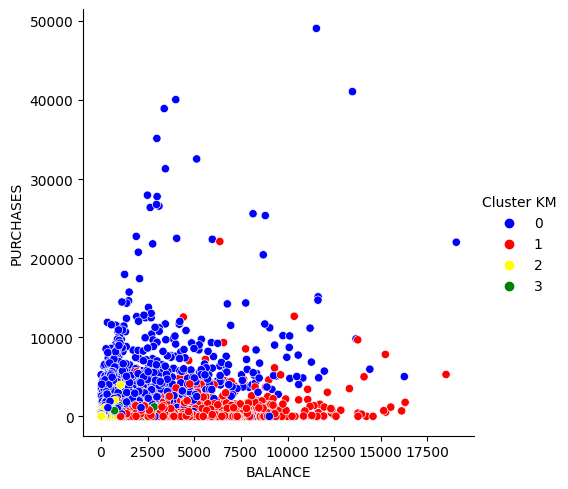

In [46]:
sns.relplot(x='BALANCE', y='PURCHASES',
            data=df, hue='Cluster KM', palette=['blue','red','yellow','green'])

Diperoleh bahwa klaster 0 merupakan customer yang banyak melakukan pembelian juga saldo tinggi, sedangkan klaster 1 merupakan customer yang memiliki saldo tinggi namun tidak banyak melakukan pembelian. Klaster 2,3 merupakan orang yang tidak banyak memiliki saldo dan tidak banyak melakukan pembelian juga.

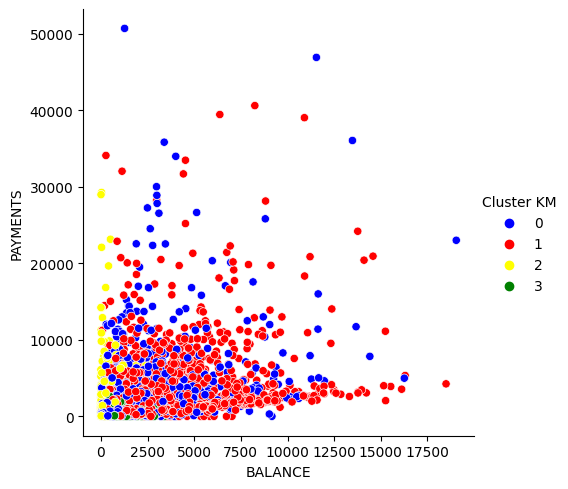

In [47]:
sns.relplot(x='BALANCE', y='PAYMENTS',
            data=df, hue='Cluster KM', palette=['blue','red','yellow','green'])

Diperoleh bahwa klaster 0,1 merupakan customer dengan saldo tinggi yang banyak melakukan pembayaran. Klaster 2 merupakan customer yang tidak memiliki banyak saldo namun banyak melakukan pembayaran. Klaster 3 merupakan customer yang tidak banyak saldo dan tidak banyak melakukan pembayaran.

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [48]:
X_new = {'BALANCE':[39,2500], 'BALANCE_FREQUENCY':[0.7,1], 'PURCHASES':[16,300],'INSTALLMENTS_PURCHASES':[0,0],
         'CASH_ADVANCE':[0,20], 'PURCHASES_FREQUENCY':[0.2,0.5], 'ONEOFF_PURCHASES_FREQUENCY':[0,0.5],
         'CASH_ADVANCE_FREQUENCY':[0.2,0.6],'PURCHASES_TRX':[2,15],'CREDIT_LIMIT':[2000,50000],'PAYMENTS':[20,2000],
         'MINIMUM_PAYMENTS':[15,1500],'PRC_FULL_PAYMENT':[0,0],'TENURE':[12,12]
}
X_new = pd.DataFrame(X_new)
X_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,39,0.7,16,0,0,0.2,0.0,0.2,2,2000,20,15,0,12
1,2500,1.0,300,0,20,0.5,0.5,0.6,15,50000,2000,1500,0,12


Melakukan standarisasi dan normalisasi pada data baru

In [49]:
sc = StandardScaler()
Xnew=sc.fit_transform(X_new)
Xnew = normalize(Xnew)

In [50]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
Xnew = pd.DataFrame(Xnew,columns=feat_cols)
Xnew.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.301511,-0.301511,-0.301511,0.0,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,0.0,0.0
1,0.301511,0.301511,0.301511,0.0,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.0,0.0


Melakukan prediksi pada data baru

In [51]:
model1 = km.fit(norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
model1.predict(Xnew)

array([3, 0], dtype=int32)

## Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Terdapat 18 atribut yang menjadi kriteria masing-masing customer yang kemudian dipilih 14 atribut yang saling independen (dilihat dari korelasi) untuk pembentukan klaster.
- Perbandingan antara metode KMeans dengan Hierarchical Clustering menunjukkan kebaikan model yang relatif sama, namun dapat dikatakan lebih baik KMeans.
- Terdapat 4 klaster optimal dengan ciri-ciri yakni klaster 0 merupakan customer dengan saldo dan pengeluaran yang banyak, klaster 1 merupakan customer dengan saldo banyak namun pengeluarannya lebih sedikit dari klaster 0, klaster 2 memiliki saldo yang lebih sedikit dari klaster 0 dan 1 dan memiliki pengeluaran yang tidak banyak juga. Klaster 3 merupakan customer dengan saldo dan pengeluaran paling sedikit diantara ketiga klaster lainnya.